# **Book Recommendation System**

#### Read the dataset with the necessary features

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
books = pd.read_csv('Books.csv', sep=';', quoting=3, error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv('BookRatings.csv', sep=';', quoting=3, error_bad_lines=False, encoding="latin-1")

b'Skipping line 6: expected 8 fields, saw 9\nSkipping line 23: expected 8 fields, saw 9\nSkipping line 25: expected 8 fields, saw 10\nSkipping line 39: expected 8 fields, saw 9\nSkipping line 85: expected 8 fields, saw 9\nSkipping line 86: expected 8 fields, saw 9\nSkipping line 120: expected 8 fields, saw 9\nSkipping line 142: expected 8 fields, saw 9\nSkipping line 193: expected 8 fields, saw 9\nSkipping line 195: expected 8 fields, saw 9\nSkipping line 205: expected 8 fields, saw 9\nSkipping line 241: expected 8 fields, saw 9\nSkipping line 293: expected 8 fields, saw 9\nSkipping line 294: expected 8 fields, saw 9\nSkipping line 304: expected 8 fields, saw 9\nSkipping line 316: expected 8 fields, saw 9\nSkipping line 351: expected 8 fields, saw 9\nSkipping line 355: expected 8 fields, saw 9\nSkipping line 394: expected 8 fields, saw 9\nSkipping line 395: expected 8 fields, saw 9\nSkipping line 427: expected 8 fields, saw 9\nSkipping line 466: expected 8 fields, saw 9\nSkipping line 

In [13]:
books.columns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher', 'ImageUrlS', 'ImageUrlM', 'ImageUrlL']
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageUrlS,ImageUrlM,ImageUrlL
0,"""0195153448""","""Classical Mythology""","""Mark P. O. Morford""","""2002""","""Oxford University Press""","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448...."
1,"""0002005018""","""Clara Callan""","""Richard Bruce Wright""","""2001""","""HarperFlamingo Canada""","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018...."
2,"""0060973129""","""Decision in Normandy""","""Carlo D'Este""","""1991""","""HarperPerennial""","""http://images.amazon.com/images/P/0060973129....","""http://images.amazon.com/images/P/0060973129....","""http://images.amazon.com/images/P/0060973129...."
3,"""0374157065""","""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999""","""Farrar Straus Giroux""","""http://images.amazon.com/images/P/0374157065....","""http://images.amazon.com/images/P/0374157065....","""http://images.amazon.com/images/P/0374157065...."
4,"""0399135782""","""The Kitchen God's Wife""","""Amy Tan""","""1991""","""Putnam Pub Group""","""http://images.amazon.com/images/P/0399135782....","""http://images.amazon.com/images/P/0399135782....","""http://images.amazon.com/images/P/0399135782...."


In [14]:
ratings.columns = ['UserID', 'ISBN', 'BookRating']
ratings.head()

,UserID,ISBN,BookRating
0,"""276725""","""034545104X""","""0"""
1,"""276726""","""0155061224""","""5"""
2,"""276727""","""0446520802""","""0"""
3,"""276729""","""052165615X""","""3"""
4,"""276729""","""0521795028""","""6"""


In [ ]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher', 'ImageUrlS', 'ImageUrlM', 'ImageUrlL']


In [ ]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['UserID', 'ISBN', 'BookRating']


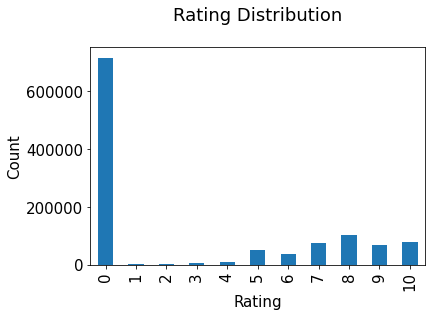

In [ ]:
plt.rc("font", size=15)
ratings.BookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
# plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [ ]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(ratings.BookRating.min()))
print('Maximum rating is: %d' %(ratings.BookRating.max()))

Minimum rating is: 0
Maximum rating is: 10


## To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [ ]:
counts1 = ratings['UserID'].value_counts()
ratings = ratings[ratings['UserID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['BookRating'].value_counts()
ratings = ratings[ratings['BookRating'].isin(counts[counts >= 100].index)]

In [ ]:
ratings.shape

(527556, 3)

In [ ]:
# Combining Books with Book Ratings
combine_book_rating = pd.merge(ratings, books, on='ISBN')

# dropping the columns which are not required
columns = ['YearOfPublication', 'Publisher', 'BookAuthor', 'ImageUrlS', 'ImageUrlM', 'ImageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,UserID,ISBN,BookRating,BookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [ ]:
combine_book_rating.shape

(488742, 4)

We then group by book titles and create a new column for total rating count.

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['BookTitle'])  # dropping the null values

ratingCount = (combine_book_rating.
     groupby('BookTitle')['BookRating'].   # groupby(by = ['BookTitle'])['BookRating'].
     count().
     reset_index().
     rename(columns = {'BookRating': 'RatingCount'})
     [['BookTitle', 'RatingCount']]
    )
ratingCount.head()

,BookTitle,RatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
ratingCount.shape

(160576, 2)

Now, we will combine cobine_book_rating data with Rating Count data, and later filter out less popular books 

In [ ]:
book_rating_ratingCount = pd.merge(combine_book_rating, ratingCount, on='BookTitle')
#book_rating_ratingCount = combine_book_rating.merge(ratingCount, left_on = 'BookTitle', right_on = 'BookTitle', how = 'left')
book_rating_ratingCount.head()

,UserID,ISBN,BookRating,BookTitle,RatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [ ]:
book_rating_ratingCount['RatingCount'].describe()

count    488742.000000
mean         21.173474
std          37.189202
min           1.000000
25%           2.000000
50%           6.000000
75%          22.000000
max         365.000000
Name: RatingCount, dtype: float64

Mean is 21, so to filter out only the popular books, we will put a threshold value, so that only the books above the threshold value shall remain in our data

In [ ]:
popularity_threshold = 50
final_df = book_rating_ratingCount.query('RatingCount >= @popularity_threshold')
final_df.head()

,UserID,ISBN,BookRating,BookTitle,RatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


# **Popularity Recommender Model**

In [ ]:
#Count of UserId for each unique product as recommendation score 
final_df_score = final_df.groupby('BookTitle').agg({'UserID': 'count'}).reset_index()
final_df_score.rename(columns = {'UserID': 'Score'},inplace=True)
final_df_score.head(40)

,BookTitle,Score
0,1984,76
1,1st to Die: A Novel,162
2,2nd Chance,124
3,4 Blondes,72
4,84 Charing Cross Road,54
5,A Bend in the Road,116
6,A Case of Need,77
7,"A Child Called \It\"": One Child's Courage to S...",85
8,A Civil Action,61
9,A Cry In The Night,50


In [ ]:
#Sort the products on recommendation score 
final_df_sort = final_df_score.sort_values(['Score'], ascending = False)  #final_df_sort = final_df_score.sort_values(['score', 'productId'], ascending = [0,1])
      
#Generate a recommendation rank based upon score 
final_df_sort['Rank'] = final_df_sort['Score'].rank(ascending=0, method='first')  #ascending=0 and ascending=False are same
          
#Get the top 5 recommendations 
popularity_recommendations = final_df_sort.head(5) 
popularity_recommendations

,BookTitle,Score,Rank
734,Wild Animus,365,1.0
95,Bridget Jones's Diary,278,2.0
605,The Lovely Bones: A Novel,272,3.0
614,The Notebook,242,4.0
617,The Pelican Brief,236,5.0


In [ ]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['UserID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [ ]:
user_index = [1,7,26,60,65,110,1000]   # This list is user choice.
for i in user_index:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 1

     UserID                  BookTitle  Score  Rank
734       1                Wild Animus    365   1.0
95        1      Bridget Jones's Diary    278   2.0
605       1  The Lovely Bones: A Novel    272   3.0
614       1               The Notebook    242   4.0
617       1          The Pelican Brief    236   5.0


The list of recommendations for the userId: 7

     UserID                  BookTitle  Score  Rank
734       7                Wild Animus    365   1.0
95        7      Bridget Jones's Diary    278   2.0
605       7  The Lovely Bones: A Novel    272   3.0
614       7               The Notebook    242   4.0
617       7          The Pelican Brief    236   5.0


The list of recommendations for the userId: 26

     UserID                  BookTitle  Score  Rank
734      26                Wild Animus    365   1.0
95       26      Bridget Jones's Diary    278   2.0
605      26  The Lovely Bones: A Novel    272   3.0
614      26           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s



Since, it is a Popularity recommender model, so, all the users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.



### Since, all the new-comer users are recommended the same Books, Accuracy is 100%

# **Collaborative Filtering Using k-Nearest Neighbors (kNN)**


## Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

For finding the Nearest Neighbors, we use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [ ]:
from scipy.sparse import csr_matrix
final_df = final_df.drop_duplicates(['UserID', 'BookTitle'])
final_df_pivot = final_df.pivot(index = 'BookTitle', columns = 'UserID', values = 'BookRating').fillna(0)
final_df_pivot.head()

UserID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,15957,...,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,266866,267635,268030,268032,268110,268330,268622,268932,269566,269719,269728,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
BookTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [ ]:
final_df_matrix = csr_matrix(final_df_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(final_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
user_index = np.random.choice(final_df_pivot.shape[0])
print(user_index)
distances, indices = model_knn.kneighbors(final_df_pivot.iloc[user_index,:].values.reshape(1, -1), n_neighbors = 6)

33


In [ ]:
final_df_pivot.index[user_index]

'Abduction'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(final_df_pivot.index[user_index]))
    else:
        print('{0}: {1}, with distance of {2}.'.format(i, final_df_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Abduction:

1: Contagion, with distance of 0.7221321631451291.
2: Cradle and All, with distance of 0.7338326924039497.
3: Eyes of Prey, with distance of 0.7586541858244813.
4: The Killing Game: Only One Can Win...and the Loser Dies, with distance of 0.7750269116748811.
5: The Bridges of Madison County, with distance of 0.7771738167413469.
